# EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_apps = pd.read_csv(r"../data/Google-Playstore-Dataset-Clean.csv")
print(df_apps.head())


   ID   App Name           Category  Rating  Installs  Minimum Installs  \
0   1    Gakondo          Adventure     0.0        10              10.0   
1   2     Vibook       Productivity     0.0        50              50.0   
2   3     IMOCCI             Social     0.0        50              50.0   
3   4  WhatsOpen      Communication     0.0        10              10.0   
4   5    Parents  Maps & Navigation     0.0       100             100.0   

   Maximum Installs  Free  Size Minimum Android      Released  Last Updated  \
0                15  True   10M      7.1 and up  Feb 26, 2020  Feb 26, 2020   
1                58  True  3.7M    4.0.3 and up   Aug 9, 2019  Aug 19, 2019   
2                89  True   46M      6.0 and up  Dec 24, 2018  Dec 20, 2019   
3                18  True  1.3M      4.4 and up  Jun 16, 2020  Dec 07, 2018   
4               330  True  2.7M      4.0 and up  Jan 10, 2018  Jun 27, 2018   

  Content Rating Installs_Category  
0       Everyone                 0  


In [4]:
num_rows, num_columns = df_apps.shape
print("The DataFrame has {} and {} columns.".format(num_rows, num_columns))

The DataFrame has 208956 and 14 columns.


Dataset Information

In [5]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208956 entries, 0 to 208955
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 208956 non-null  int64  
 1   App Name           208955 non-null  object 
 2   Category           208956 non-null  object 
 3   Rating             208956 non-null  float64
 4   Installs           208956 non-null  int64  
 5   Minimum Installs   208956 non-null  float64
 6   Maximum Installs   208956 non-null  int64  
 7   Free               208956 non-null  bool   
 8   Size               208956 non-null  object 
 9   Minimum Android    208956 non-null  object 
 10  Released           208956 non-null  object 
 11  Last Updated       208956 non-null  object 
 12  Content Rating     208956 non-null  object 
 13  Installs_Category  208956 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 20.9+ MB


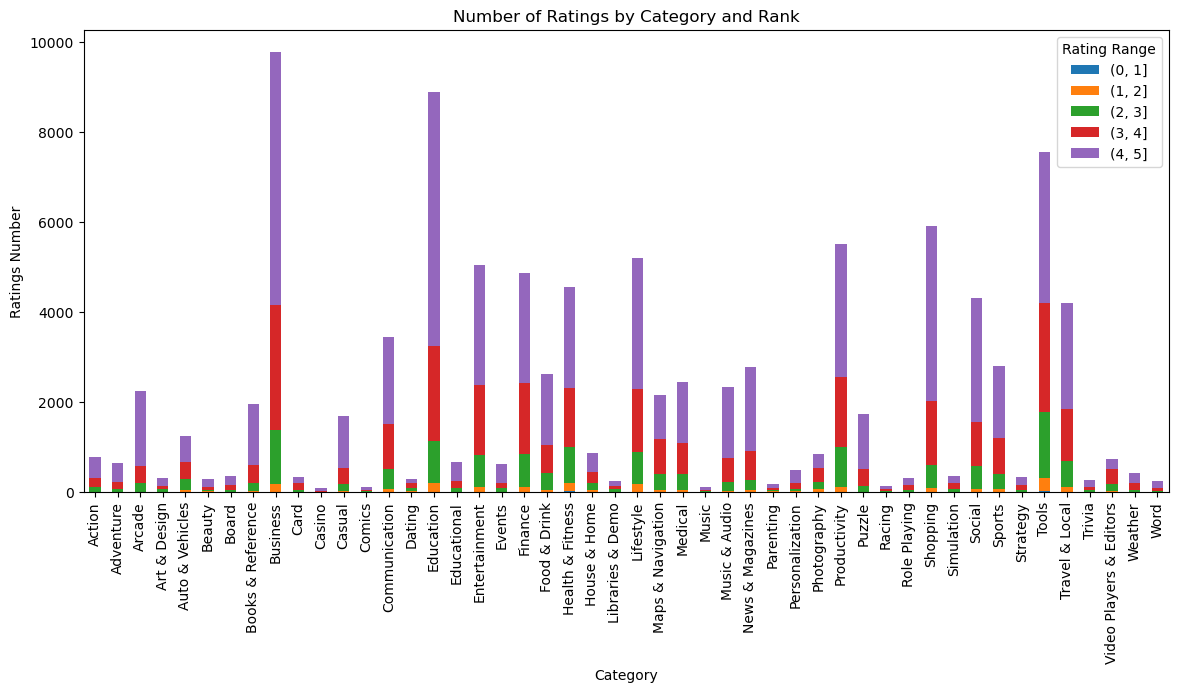

In [6]:
ranges = [0, 1, 2, 3, 4, 5]
rating_range = pd.cut(df_apps['Rating'], bins=ranges)
counting_ratings_category = df_apps.groupby([df_apps['Category'], rating_range]).size().unstack(fill_value=0)
counting_ratings_category.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Number of Ratings by Category and Rank')
plt.xlabel('Category')
plt.ylabel('Ratings Number')
plt.xticks(rotation=90)
plt.legend(title='Rating Range')
plt.show()

* The category with the highest number of qualifications is Education.
* The categories with fewer ratings are comics and parenting.
* The categories with the highest proportion of applications with a rating of 4 to 5 stars are Education, Business, Tools and Entertainment.

Frequency Table

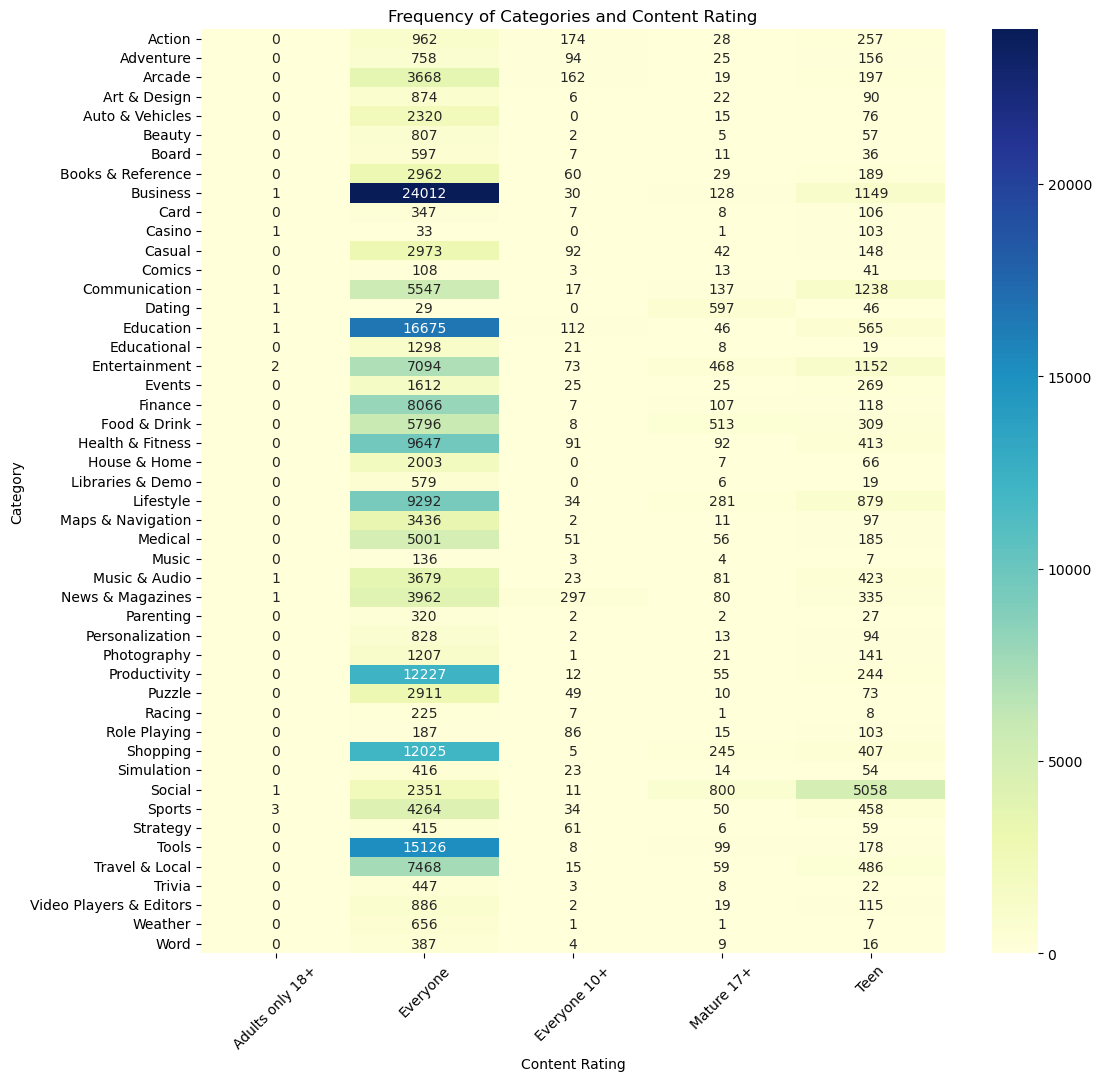

In [7]:
frequency_table = df_apps[df_apps['Content Rating'] != 'Unrated'].groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 12))
sns.heatmap(frequency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Categories and Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

* Everyone has more apps in the categories of Education and Business.
* Teens have more apps in Social and Music and Audio.
* Adults have more apps in Entertainment.

Top 10 Most Installed Apps in the Education Category

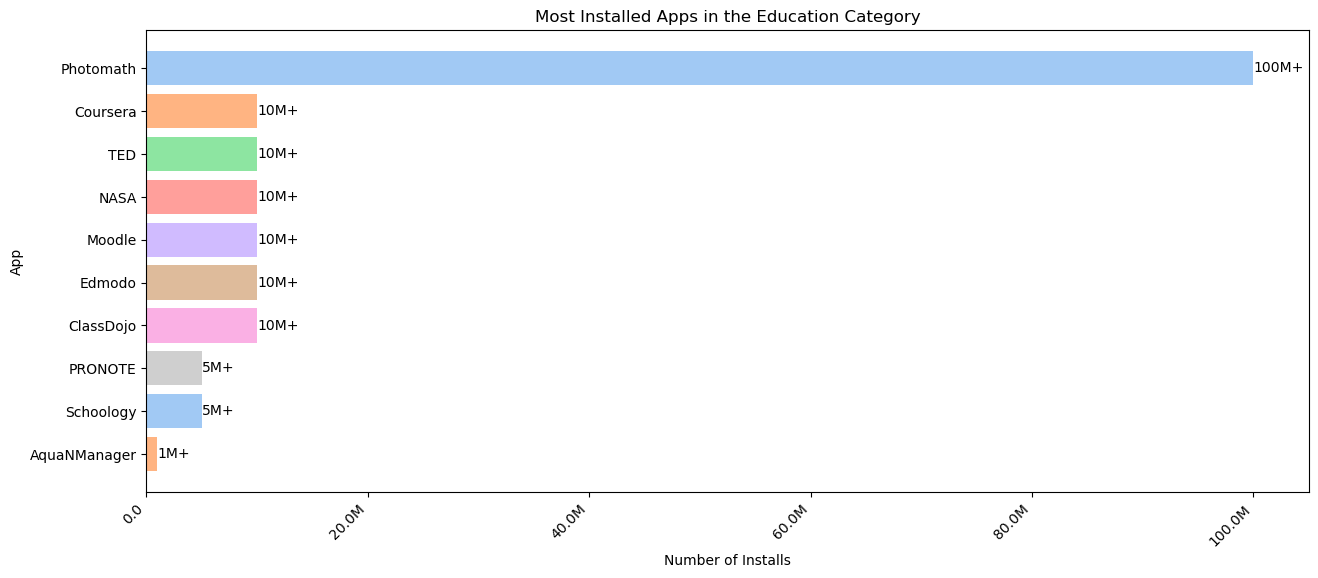

In [8]:
df_educ = df_apps[df_apps['Category'] == 'Education']
educ_sorted = df_educ.sort_values(by='Installs', ascending=False)
top_educ = educ_sorted.head(10)

palette = sns.color_palette('pastel', 8)
plt.figure(figsize=(15, 6))
bars = plt.barh(top_educ['App Name'], top_educ['Installs'], color=palette)
for bar, install_count in zip(bars, top_educ['Installs']):
    if install_count >= 1000000000:
        label = f'{install_count // 1000000000}B+'
    elif install_count >= 1000000:
        label = f'{install_count // 1000000}M+'
    else:
        label = f'{install_count}+'
    plt.text(install_count, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Education Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
def millions_formatter(x, pos):
    if x >= 1000000000:
        return f"{x/1000000000:.1f}B"
    elif x >= 1000000:
        return f"{x/1000000:.1f}M"
    else:
        return f"{x:,}"
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(millions_formatter))
plt.show()

Top 10 Most Installed Apps in the Social Category

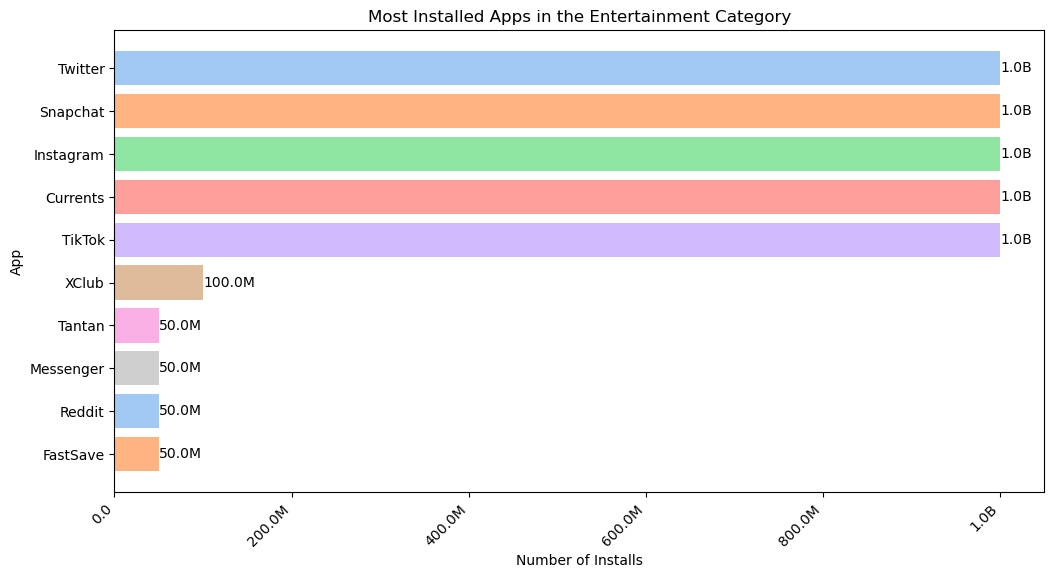

In [9]:
df_social = df_apps[df_apps['Category'] == 'Social']
social_sorted = df_social.sort_values(by='Installs', ascending=False)
top_social = social_sorted.head(10)

palette = sns.color_palette('pastel', 8)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_social['App Name'], top_social['Installs'], color=palette)
for bar, install_count in zip(bars, top_social['Installs']):
    if install_count >= 1000000000:
        label = f"{install_count // 1000000000:.1f}B"
    elif install_count >= 1000000:
        label = f"{install_count // 1000000:.1f}M"
    else:
        label = f"{install_count:,}"
    plt.text(install_count, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Entertainment Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(millions_formatter))
plt.show()

Top 10 Most Installed Apps in the Entertainment Category

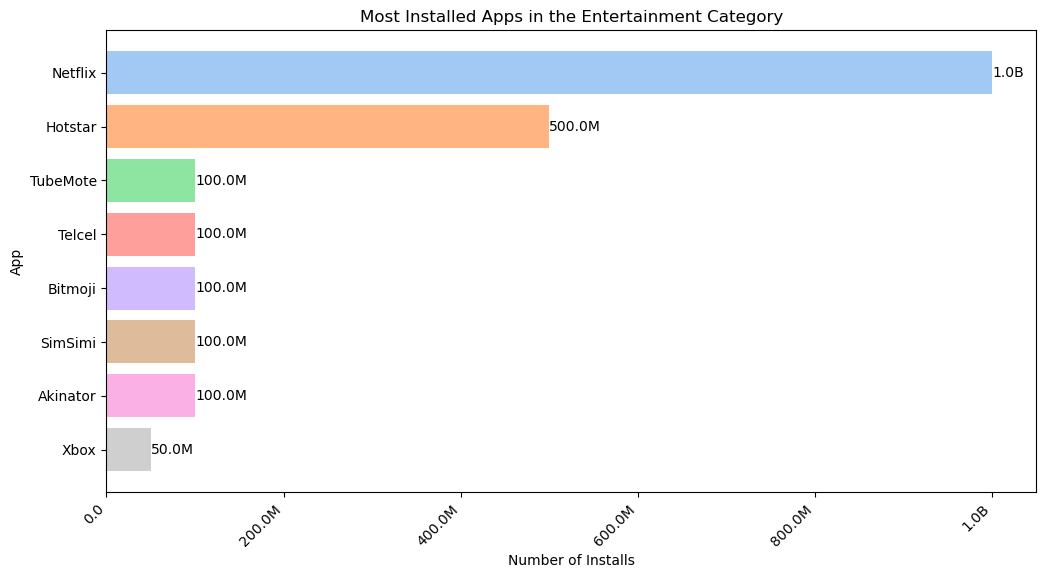

In [10]:
df_entt = df_apps[df_apps['Category'] == 'Entertainment']

entt_sorted = df_entt.sort_values(by='Installs', ascending=False)
top_entt = entt_sorted.head(8)  

palette = sns.color_palette('pastel', 8)
plt.figure(figsize=(12, 6))
bars = plt.barh(top_entt['App Name'], top_entt['Installs'], color=palette)
for bar, install_count in zip(bars, top_entt['Installs']):
    if install_count >= 1000000000:
        label = f"{install_count // 1000000000:.1f}B"
    elif install_count >= 1000000:
        label = f"{install_count // 1000000:.1f}M"
    else:
        label = f"{install_count:,}"
    plt.text(install_count, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Most Installed Apps in the Entertainment Category')
plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='x')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(millions_formatter))
plt.show()

Top 5 Apps Rating Count

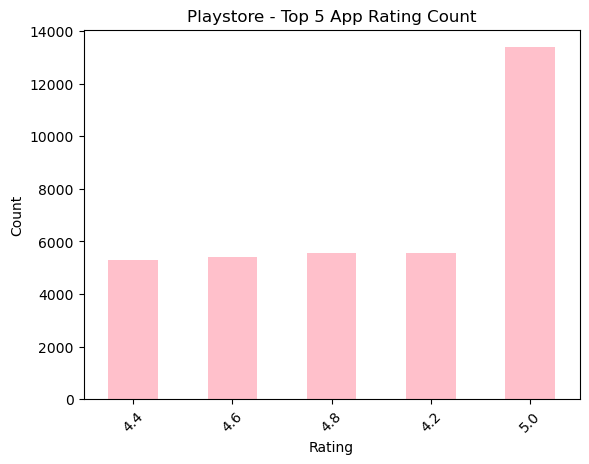

In [11]:
df_filtered = df_apps[df_apps["Rating"] != 0.0]
df_filtered["Rating"].value_counts().nlargest(5).sort_values(ascending=True).plot.bar(color='pink')
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating Count")
plt.xticks(rotation=45)
plt.show()

Here We try to sort app with rating 5 corresponding to installs

In [12]:
df5 = df_apps.sort_values(by=['Installs'], ascending=False)
df5

,ID,App Name,Category,Rating,Installs,Minimum Installs,Maximum Installs,Free,Size,Minimum Android,Released,Last Updated,Content Rating,Installs_Category
6396,6397,TikTok,Social,4.4,1000000000,1.000000e+09,1645811582,True,89M,4.4 and up,"Jul 9, 2015","Jun 15, 2021",Teen,5B+
168420,168421,Snapchat,Social,4.3,1000000000,1.000000e+09,1621265491,True,72M,4.4 and up,"Oct 29, 2012","Jun 15, 2021",Teen,5B+
3626,3627,Netflix,Entertainment,4.4,1000000000,1.000000e+09,1437250170,True,Varies with device,Varies with device,"May 5, 2011","Jun 14, 2021",Teen,5B+
188810,188811,Twitter,Social,3.5,1000000000,1.000000e+09,1144061939,True,Varies with device,Varies with device,"Apr 30, 2010","Jun 14, 2021",Mature 17+,5B+
29500,29501,Instagram,Social,3.8,1000000000,1.000000e+09,3559871277,True,Varies with device,Varies with device,"Apr 3, 2012","Jun 14, 2021",Teen,5B+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71692,71693,Julepynt,Books & Reference,0.0,0,0.000000e+00,0,False,1.8M,2.3 and up,"Dec 5, 2015","Dec 05, 2015",Everyone,0
100550,100551,NPjoon,Social,0.0,0,0.000000e+00,0,True,35M,5.0 and up,"Jan 5, 2021","Jan 06, 2021",Teen,0
150636,150637,AsistenciaAEELF,Education,0.0,0,0.000000e+00,0,True,3.6M,4.4 and up,"Nov 8, 2019","Nov 08, 2019",Everyone,0
186950,186951,Fgream,Shopping,0.0,0,0.000000e+00,0,True,23M,4.2 and up,"Feb 25, 2021","May 28, 2021",Teen,0


Value count of each category for the apps with rating 10

In [15]:
df6 = df_apps.Category.value_counts(ascending=False)
print(df6)

Category
Business                   25320
Education                  17399
Tools                      15413
Shopping                   12682
Productivity               12538
Lifestyle                  10487
Health & Fitness           10243
Entertainment               8792
Finance                     8298
Social                      8221
Travel & Local              8028
Communication               6940
Food & Drink                6626
Medical                     5294
Sports                      4809
News & Magazines            4675
Music & Audio               4207
Arcade                      4046
Maps & Navigation           3546
Casual                      3255
Books & Reference           3240
Puzzle                      3043
Auto & Vehicles             2411
House & Home                2076
Events                      1931
Action                      1422
Photography                 1371
Educational                 1346
Adventure                   1033
Video Players & Editors     1022
A

Top 10 Categories by Number of Apps

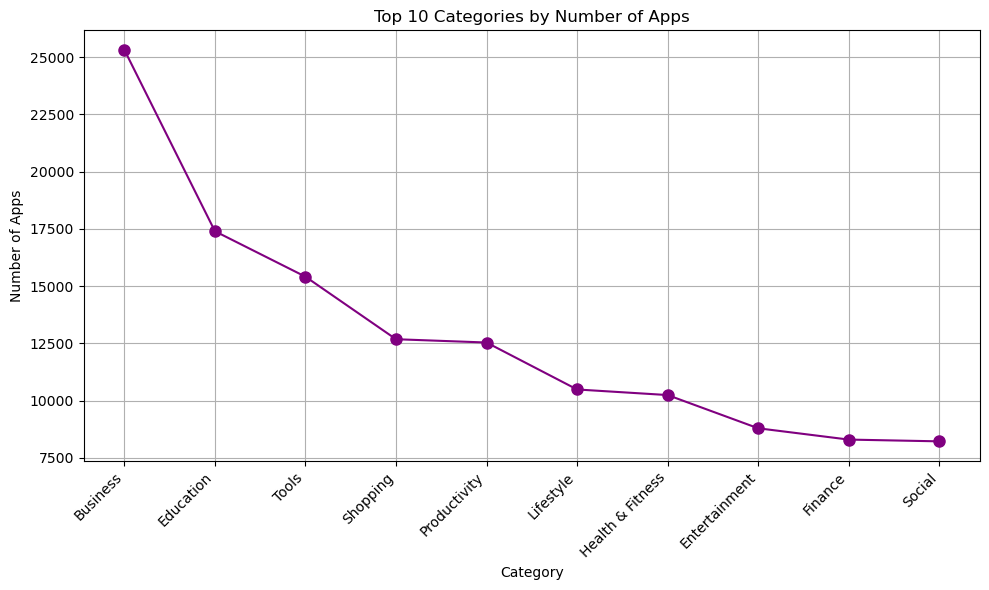

In [16]:
category_counts = df_apps['Category'].value_counts()

top_categories = category_counts.nlargest(10)
top_categories1 = top_categories.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(top_categories1.index, top_categories1, marker='o', markersize=8, color='purple')
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Top 10 Categories by Number of Apps")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Top 10 Category with highest average Rating

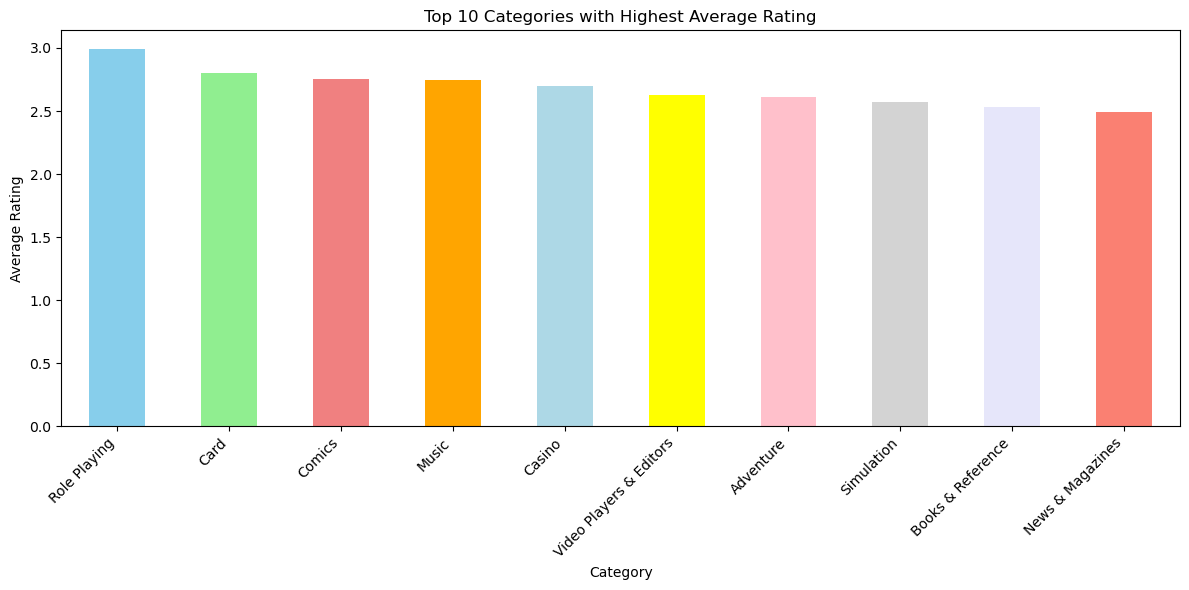

In [17]:
high_rating = df_apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'lightblue', 'yellow', 'pink', 'lightgrey', 'lavender', 'salmon']
high_rating.plot(kind='bar', color=colors)
plt.title('Top 10 Categories with Highest Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Categories with the highest number of installations on the Google Play Store

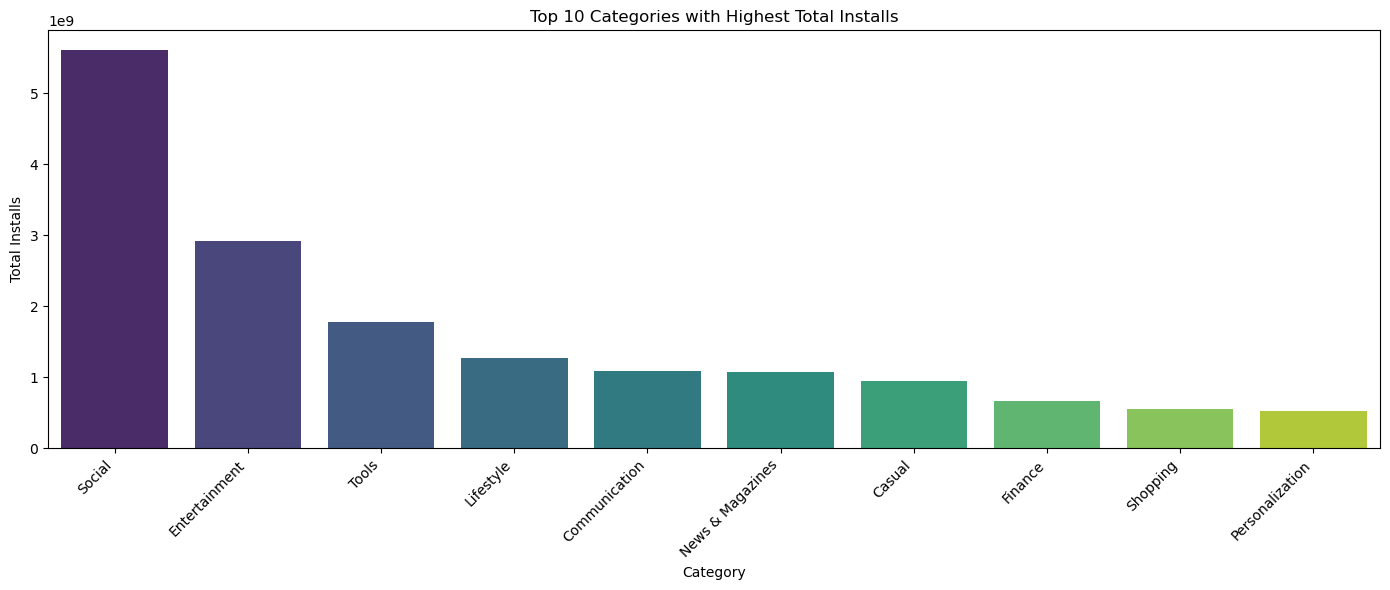

In [18]:
high_installs = df_apps.groupby('Category')['Installs'].sum().nlargest(10).reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=high_installs, x='Category', y='Installs', palette="viridis")
plt.ylabel('Total Installs')
plt.xlabel('Category')
plt.title('Top 10 Categories with Highest Total Installs')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()